In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 
import os
# Current Workspace
# print(os.getcwd()) Data file must be here 
df = pd.read_csv('heart_cleveland_upload.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [100]:
import pandas as pd

df = pd.read_csv('heart_cleveland_upload.csv')

# Calculate counts
counts = df['condition'].value_counts()

# Calculate percentages (normalize=True gives the proportion)
percentages = df['condition'].value_counts(normalize=True) * 100

# Combine into a nice table
summary_table = pd.DataFrame({
    'Count': counts, 
    'Percentage (%)': percentages.round(2)
})

print(summary_table) # We have a balanced dataset

           Count  Percentage (%)
condition                       
0            160           53.87
1            137           46.13


In [102]:

# 1. Define your lists manually based on your knowledge of the data
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca','thal','condition']

# 2. Analyze Numerical Data (Mean, Median, Std Dev)
print("--- Numerical Statistics ---")
num_stats = df[numerical_cols].describe().T[['mean', '50%', 'std', 'min', 'max']]
num_stats = num_stats.rename(columns={'50%': 'median'})
num_stats['skewness'] = df[numerical_cols].skew()
num_stats['kurtosis'] = df[numerical_cols].kurt()
num_stats = num_stats.round(2)
print(num_stats)

# 3. Analyze Categorical Data (We want Counts and Proportions)
print("\n--- Categorical Statistics ---")
for col in categorical_cols:
    # Calculate the breakdown of categories
    counts = df[col].value_counts()
    percent = df[col].value_counts(normalize=True) * 100
    
    # Combine into a readable dataframe
    summary = pd.DataFrame({'Count': counts, 'Percentage (%)': percent.round(1)})
    
    print(f"\nVariable: {col}")
    print(summary)

--- Numerical Statistics ---
            mean  median    std    min    max  skewness  kurtosis
age        54.54    56.0   9.05   29.0   77.0     -0.22     -0.52
trestbps  131.69   130.0  17.76   94.0  200.0      0.70      0.81
chol      247.35   243.0  52.00  126.0  564.0      1.12      4.44
thalach   149.60   153.0  22.94   71.0  202.0     -0.54     -0.05
oldpeak     1.06     0.8   1.17    0.0    6.2      1.25      1.51

--- Categorical Statistics ---

Variable: sex
     Count  Percentage (%)
sex                       
1      201            67.7
0       96            32.3

Variable: cp
    Count  Percentage (%)
cp                       
3     142            47.8
2      83            27.9
1      49            16.5
0      23             7.7

Variable: fbs
     Count  Percentage (%)
fbs                       
0      254            85.5
1       43            14.5

Variable: restecg
         Count  Percentage (%)
restecg                       
0          147            49.5
2          146 

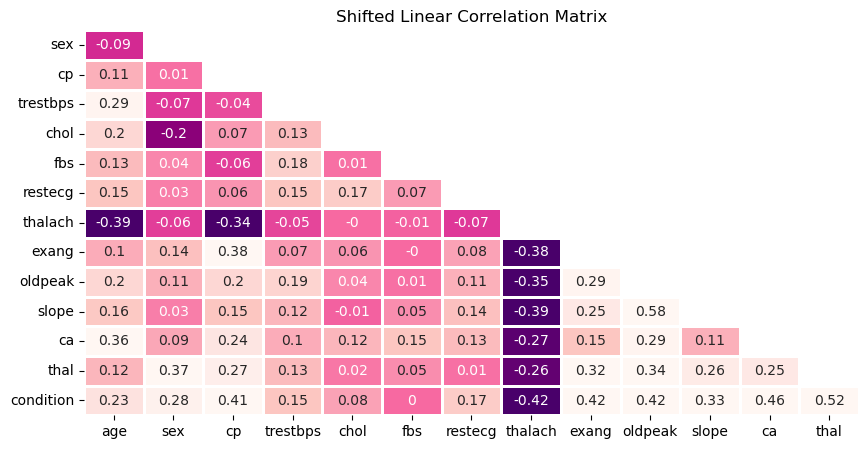

In [46]:

def corrMat(df, id=False):
    # Calculate correlation
    corr_mat = df.corr().round(2)
    
    # Setup plot
    f, ax = plt.subplots(figsize=(10, 5))
    
    # Create mask (using 'bool' instead of 'np.bool')
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    
    # Shift the matrix (remove first row and last col) to remove the diagonal
    mask = mask[1:, :-1]
    corr = corr_mat.iloc[1:, :-1].copy()
    
    # Plot heatmap
    sns.heatmap(corr, mask=mask, vmin=-0.3, vmax=0.3, center=0, 
                cmap='RdPu_r', square=False, lw=2, annot=True, cbar=False)
    
    ax.set_title('Shifted Linear Correlation Matrix')
    plt.show() # Make sure to show the plot!

# Call the function OUTSIDE the definition (no indentation)
corrMat(df)


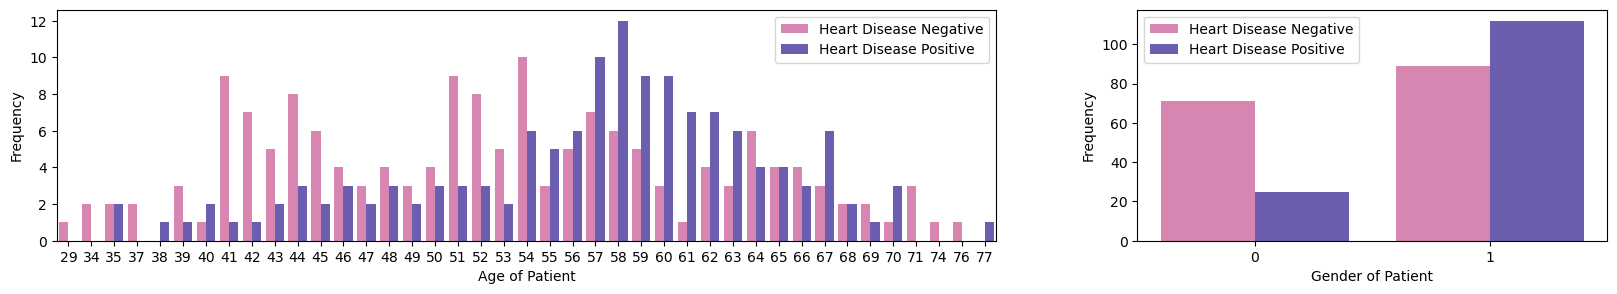

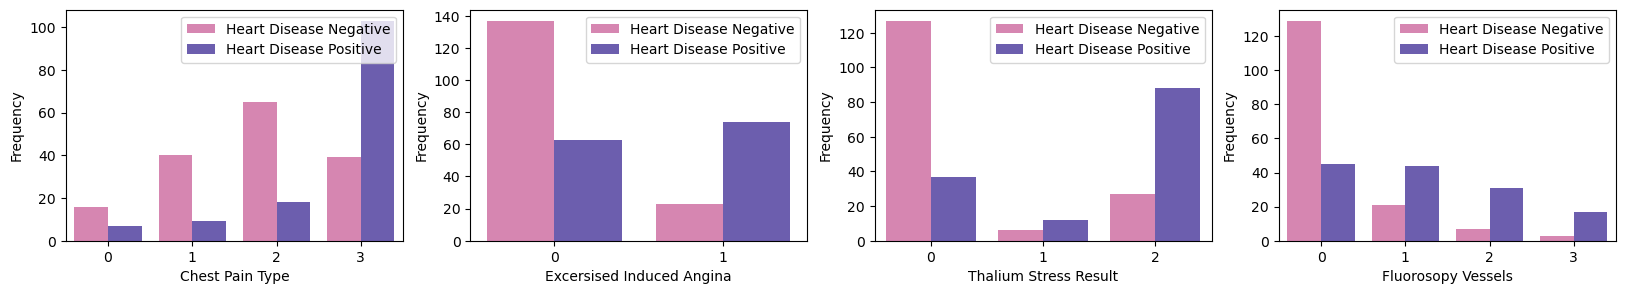

In [76]:
''' CountPlot Histograms '''

plt4 = ['#E379B2','#6351BB']
def plot1count(x,xlabel,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition', data=df, palette=palt)
    plt.legend(["Heart Disease Negative", "Heart Disease "],loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
    
def plot1count_ordered(x,xlabel,order,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition',data=df,order=order,palette=palt)
    plt.legend(["Heart Disease Negative", "Heart Disease Positive"],loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

def plot2count(x1,x2,xlabel1,xlabel2,colour,rat,ind1=None,ind2=None):
    
    # colour, ratio, index_sort

    fig,ax = plt.subplots(1,2,figsize=(20,3),gridspec_kw={'width_ratios':rat})
    # Number of major vessels (0-3) colored by flourosopy
    sns.countplot(x=x1,hue='condition',data=df,order=ind1,palette=colour,ax=ax[0])
    ax[0].legend(["Heart Disease Negative", "Heart Disease Positive"],loc='upper right')
    ax[0].set_xlabel(xlabel1)
    ax[0].set_ylabel('Frequency')

    # Defect Information (0 = normal; 1 = fixed defect; 2 = reversable defect )
    sns.countplot(x=x2,hue='condition', data=df,order=ind2,palette=colour,ax=ax[1])
    ax[1].legend(["Heart Disease Negative", "Heart Disease Positive"],loc='best')
    ax[1].set_xlabel(xlabel2)
    ax[1].set_ylabel('Frequency')
    plt.show()
    
''' Plot n Countplots side by side '''
def nplot2count(lst_name,lst_label,colour,n_plots):
    
    ii=-1;fig,ax = plt.subplots(1,n_plots,figsize=(20,3))
    for i in range(0,n_plots):
        ii+=1;id1=lst_name[ii];id2=lst_label[ii]
        sns.countplot(x=id1,hue='condition',data=df,palette=colour,ax=ax[ii])
        ax[ii].legend(["Heart Disease Negative", "Heart Disease Positive"],loc='upper right')
        ax[ii].set_xlabel(id2)
        ax[ii].set_ylabel('Frequency')

plot2count('age','sex','Age of Patient','Gender of Patient',plt4,[2,1])
lst1 = ['cp','exang','thal','ca']
lst2 = ['Chest Pain Type','Excersised Induced Angina','Thalium Stress Result','Fluorosopy Vessels']
nplot2count(lst1,lst2,plt4,4)

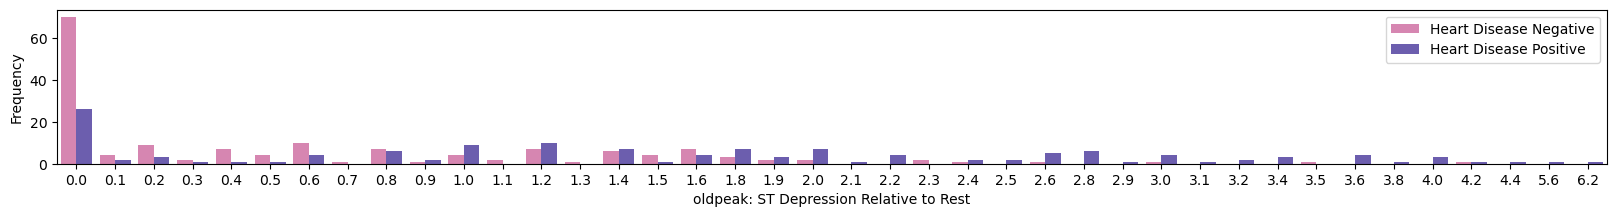

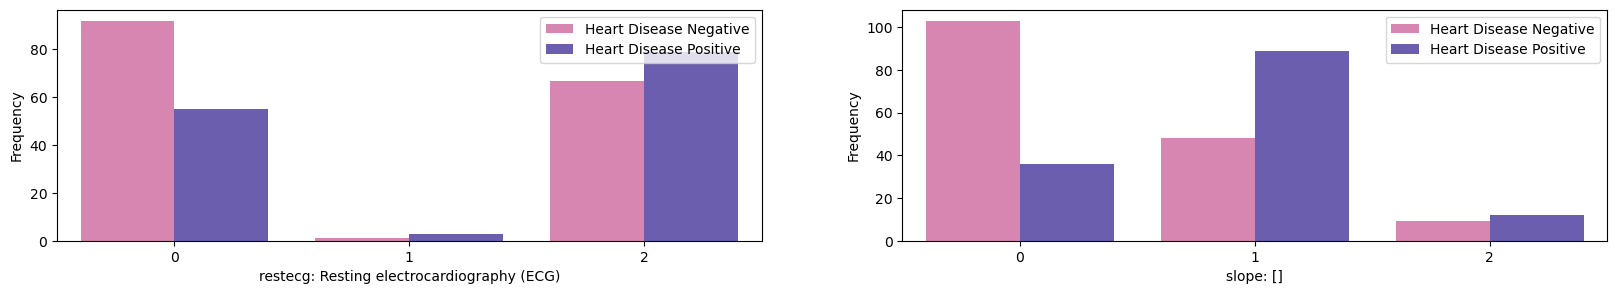

In [78]:
lst_ecg = ['oldpeak','restecg','slope','condition']
plot1count('oldpeak','oldpeak: ST Depression Relative to Rest',plt4)
plot2count('restecg','slope','restecg: Resting electrocardiography (ECG)','slope: []',plt4,[1,1])

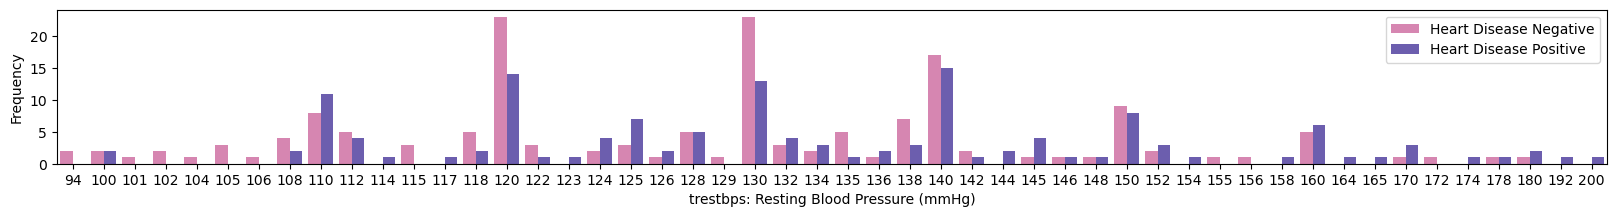

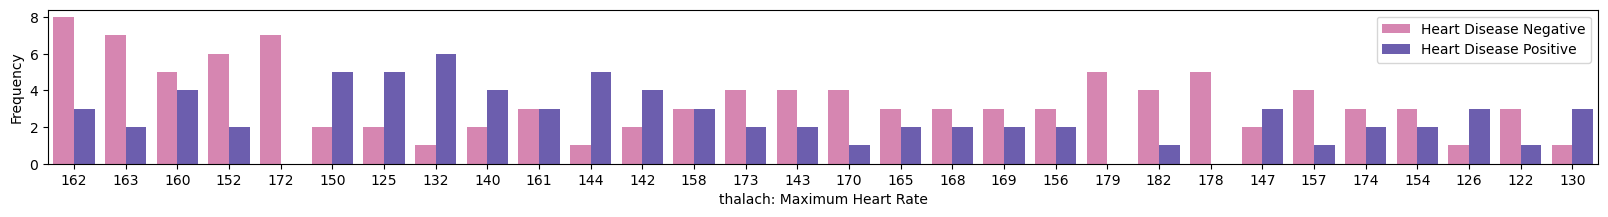

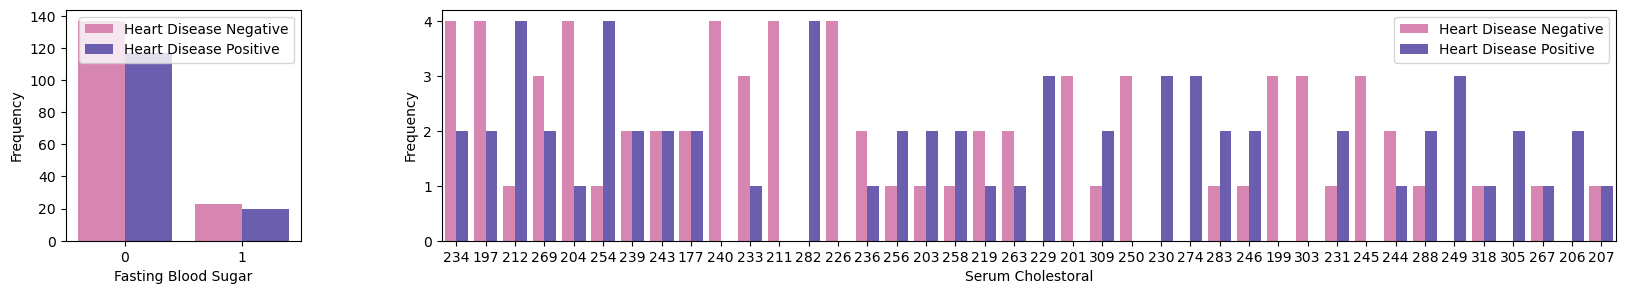

In [80]:
lst_blood = ['trestbps','thalach','fbs','chol','condition']
plot1count('trestbps','trestbps: Resting Blood Pressure (mmHg)',plt4)
plot1count_ordered('thalach','thalach: Maximum Heart Rate',df['thalach'].value_counts().iloc[:30].index,plt4)
plot2count('fbs','chol','Fasting Blood Sugar','Serum Cholestoral',plt4,[2,10],None,df['chol'].value_counts().iloc[:40].index)